# Introduction

According to the article "Heart Disease Classification" by Dhara Rana (https://towardsdatascience.com/heart-disease-classification-8359c26c7d83)

Cardiovascular disease (CVD) or heart disease is one of the leading causes of death in the United States. The Center for Disease Control Prevention estimates 647,000 deaths per year¹. CVD is an umbrella term that encompasses different heart conditions that include diseased blood vessels (atherosclerosis or vasculitis), structural problems (cardiomegaly), and irregular heartbeats (arrhythmia). Of the CVD, the most common type of heart disease in the United State is coronary artery disease. Most of the time CVD is “silent” and there is no diagnosis until individuals experience signs or symptoms of a heart attack, heart failure, or arrhythmia². Research has identified risk factors that are associated with developing CVD. These risk factors can be non-modifiable, where the factors cannot be changed, or modifiable factors, where the factors can be changed.

Problem Statement: Predicts whether a person is suffering from heart disease or not.
This dataset contains information about diagnoses of heart disease patients. Machine learning model is needed in order to determine whether a person has heart disease or not. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

The non-modifiable risk factors are³:

Increasing age
Biological Sex — -men are at greater risk than women

Hereditary

The modifiable risk factors include³:

Smoking tobacco

High blood cholesterol

High blood pressure

Physical inactivity

Obesity

Diabetes

# Reference:



Heart Disease Classification" by Dhara Rana (https://towardsdatascience.com/heart-disease-classification-8359c26c7d83)

'Regression by PyCaret' by KHADIJE ABEDI (https://www.kaggle.com/code/abedi756/regression-by-pycaret/notebook)

# Data Description

age = age in years

sex = (1 = male; 0 = female)

cp= chest pain type

trestbps= resting blood pressure (in mm Hg on admission to the hospital)

chol = serum cholestoral in mg/dl

fbs = ( fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg = resting electrocardiographic results

thalach = maximum heart rate achieved

exang = exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

slope = the slope of the peak exercise ST segment

ca = number of major vessels (0-3) colored by flourosopy

thal3 = normal; 6 = fixed defect; 7 = reversable defect

target = 1 or 0

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [4]:
df=pd.read_csv(r"C:\Users\Rushikesh\Downloads\Heart Disease Dataset.csv",header=0)

In [7]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
df.shape

(303, 14)

# Data Preprocessing

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Missing Data Checking

In [13]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The dataset does not have any missing data

# Correlation

In [14]:
cor = df.corr()
cor

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


# Heatmap

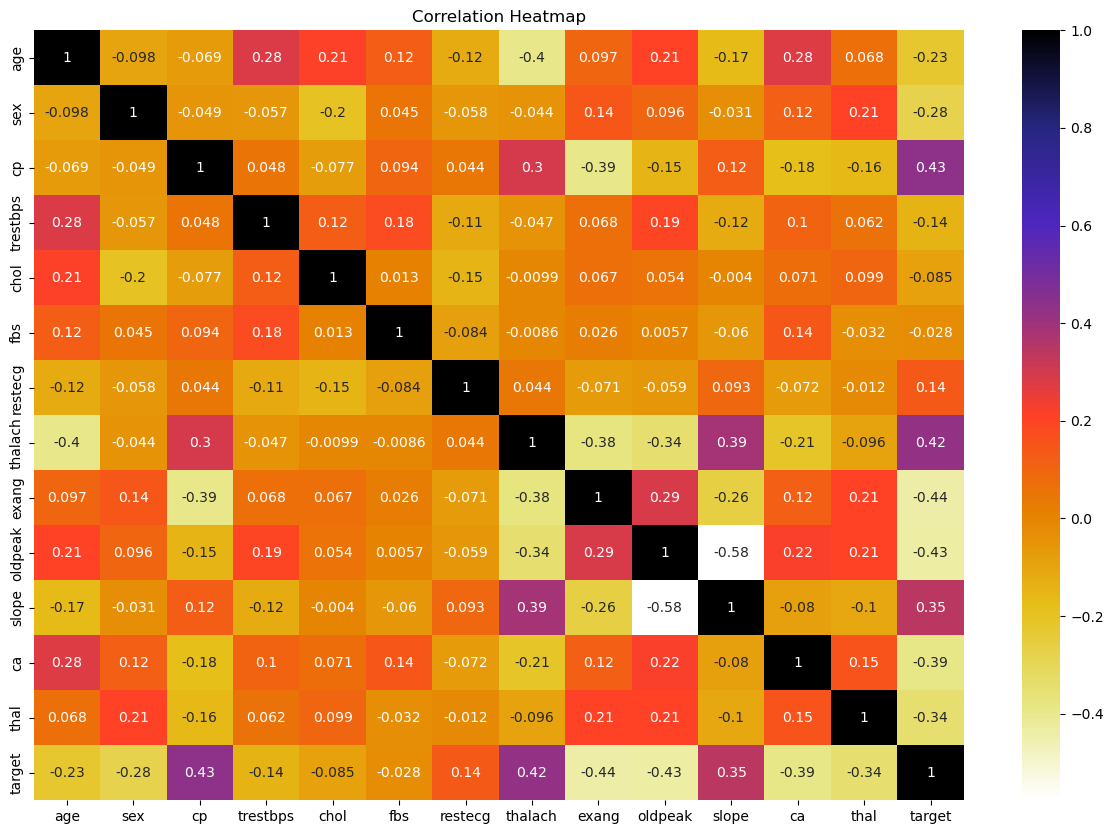

In [15]:
plt.figure(figsize=(15, 10))
sns.heatmap(cor, annot = True, cmap =plt.cm.CMRmap_r)
plt.title('Correlation Heatmap')
plt.show()

# Exploratory Data Analysis

<Axes: xlabel='age', ylabel='Count'>

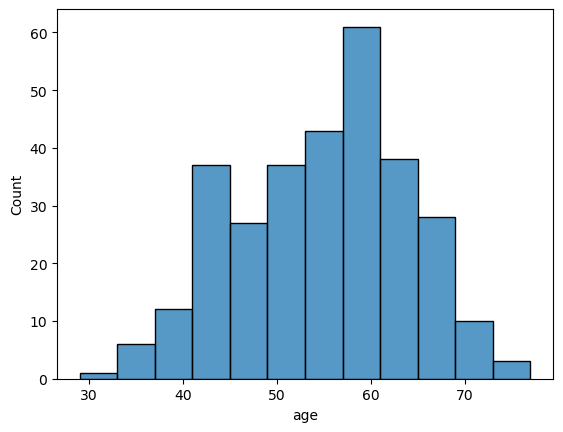

In [16]:
sns.histplot(data = df, x = 'age', bins = 'auto')

<Axes: xlabel='target', ylabel='age'>

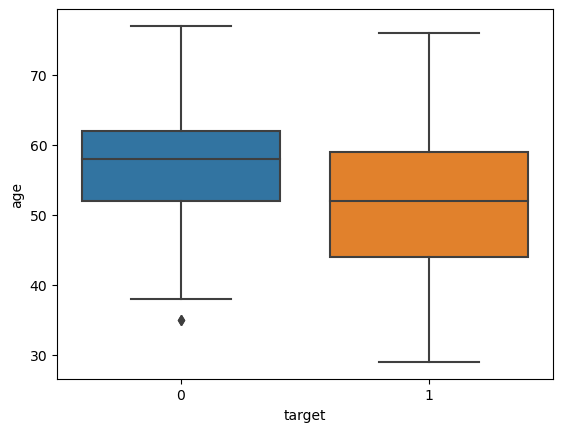

In [17]:
sns.boxplot(data = df, x = 'target', y = 'age')

<Axes: xlabel='target', ylabel='chol'>

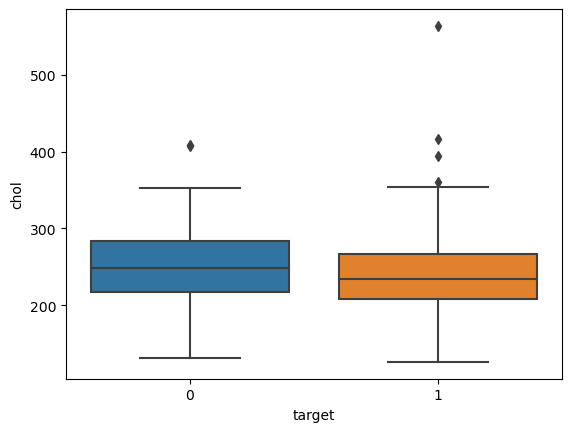

In [18]:
sns.boxplot(data = df, x = 'target', y = 'chol')

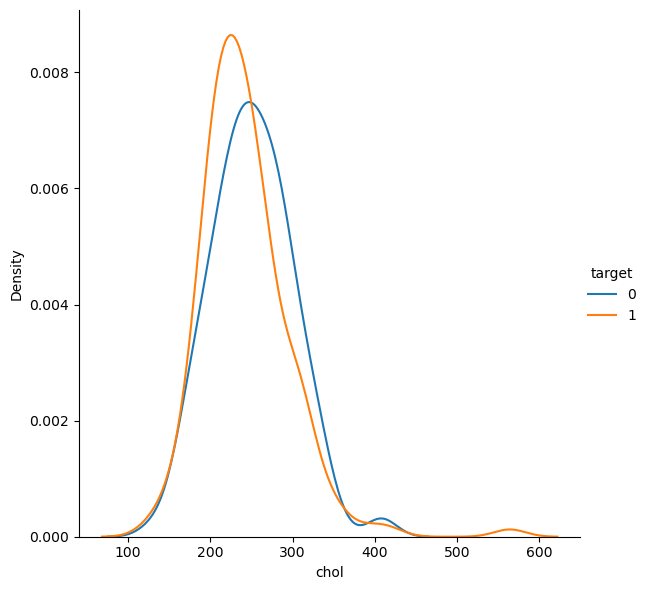

In [19]:
sns.FacetGrid(df, hue = 'target', height = 6).map(sns.kdeplot, 'chol').add_legend()

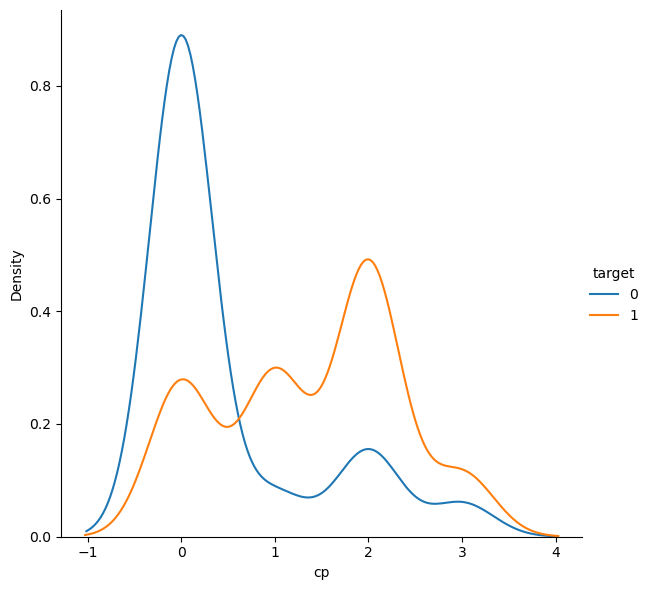

In [20]:
sns.FacetGrid(df, hue = 'target', height = 6).map(sns.kdeplot, 'cp').add_legend()

# Model Building

# Creating Feature columns and Target column

In [21]:
feature_cols = ['age',	'sex',	'cp',	'trestbps',	'chol',	'fbs',	'restecg',	'thalach',	'exang',	'oldpeak',	'slope',	'ca',	'thal']
X = df[feature_cols]
y = df['target']

# splitting dataset into Training and Testing set

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,stratify=y)
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2
236,58,1,0,125,300,0,0,171,0,0.0,2,2,3
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3
214,56,1,0,125,249,1,0,144,1,1.2,1,1,2
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2


In [53]:
y_test

157    1
236    0
245    0
290    0
212    0
214    0
140    1
84     1
278    0
274    0
243    0
76     1
136    1
7      1
39     1
33     1
219    0
95     1
291    0
193    0
189    0
98     1
116    1
28     1
24     1
88     1
224    0
215    0
77     1
137    1
138    1
Name: target, dtype: int64

In [54]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2
80,41,1,2,112,250,0,1,179,0,0.0,2,0,2
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3


In [55]:
y_train

154    1
93     1
80     1
225    0
192    0
      ..
118    1
56     1
231    0
277    0
143    1
Name: target, Length: 272, dtype: int64

# 1. Decision Tree Classifier

In [56]:
from sklearn import tree

tr = tree.DecisionTreeClassifier(random_state = 45)
tr.fit(X_train, y_train)
y_pred = tr.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

Accuracy of Training & Testing

In [57]:
from sklearn.metrics import accuracy_score

tr_acc = accuracy_score(y_test, y_pred)
print('accuracy_score : ', tr_acc)

accuracy_score :  0.7419354838709677


# Classification Report and Confusion Matrix

In [58]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

report = classification_report(y_test, y_pred)
print(report)

[[11  3]
 [ 5 12]]
              precision    recall  f1-score   support

           0       0.69      0.79      0.73        14
           1       0.80      0.71      0.75        17

    accuracy                           0.74        31
   macro avg       0.74      0.75      0.74        31
weighted avg       0.75      0.74      0.74        31



# 2.Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs = -1, n_estimators = 100, max_features = 5, random_state = 45)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

Accuracy of Training & Testing

In [65]:
from sklearn.metrics import accuracy_score

rf_acc = accuracy_score(y_test, y_pred)
print("accuracy_score: ", rf_acc)

accuracy_score:  0.8709677419354839


# Classification Report & Confusion Matrix

In [66]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

report = classification_report(y_test, y_pred)
print(report)

[[12  2]
 [ 2 15]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.88      0.88      0.88        17

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



# 3.Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

Accuracy of Training & Testing

In [73]:
from sklearn.metrics import accuracy_score

gnb_acc = accuracy_score(y_test, y_pred)
print("accuracy_score: ", gnb_acc)

accuracy_score:  0.7741935483870968


# Classification Report & Confusion Matrix

In [74]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

report = classification_report(y_test, y_pred)
print(report)

[[ 9  5]
 [ 2 15]]
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        14
           1       0.75      0.88      0.81        17

    accuracy                           0.77        31
   macro avg       0.78      0.76      0.77        31
weighted avg       0.78      0.77      0.77        31



# 3.Support Vector Machine SVM

In [79]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear') # use for hyperplane, it is by default = 'rbf'
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

Accuracy of Training & Testing

In [80]:
from sklearn.metrics import accuracy_score

svm_acc = accuracy_score(y_test, y_pred)
print('accuracy_score: ', svm_acc)

accuracy_score:  0.8709677419354839


# Classification Report & Confusion Matrix

In [81]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

report = classification_report(y_test, y_pred)
print(report)

[[12  2]
 [ 2 15]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.88      0.88      0.88        17

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



# Summary

In [86]:
pd.DataFrame(data={'Model': ['Decision Tree Classifier', 'Random Forest Classifier', 'Naive Bayes', 'Support Vector Machine (SVM)'], 'Accuracy %': [tr_acc, rf_acc, gnb_acc, svm_acc]})

,Model,Accuracy %
0,Decision Tree Classifier,0.741935
1,Random Forest Classifier,0.870968
2,Naive Bayes,0.774194
3,Support Vector Machine (SVM),0.870968


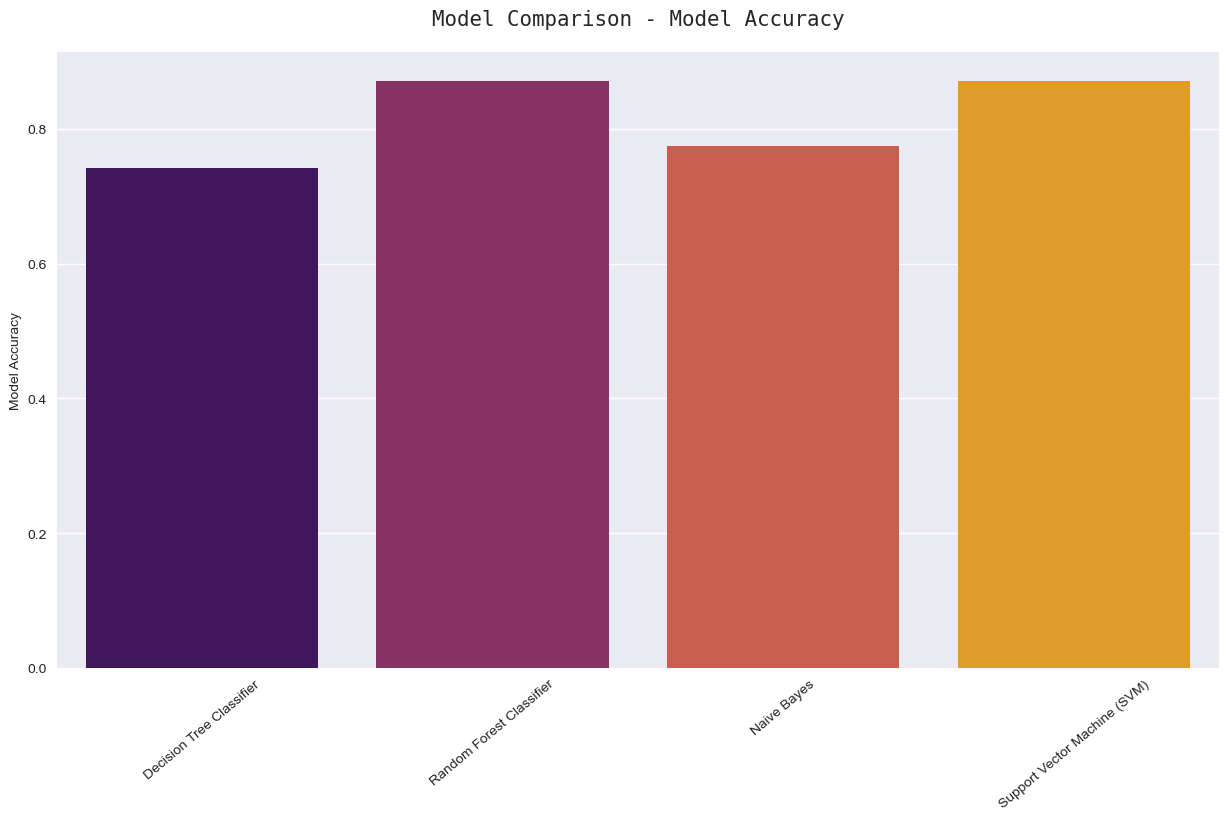

In [87]:
plt.style.use("seaborn")

x = ['Decision Tree Classifier', 'Random Forest Classifier', 'Naive Bayes','Support Vector Machine (SVM)']

y = [tr_acc, rf_acc, gnb_acc, svm_acc]

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x=x,y=y, palette='inferno')
plt.ylabel('Model Accuracy')
plt.xticks(rotation=40)
plt.title('Model Comparison - Model Accuracy', fontsize=15, fontname='monospace', y=1.03);

# Conclusion

From all the Above models,Random Forest Classifier and support Vector machine model has high precision, recall, and F1-score for both classes, and a high overall accuracy,but, i am going with Random forest classifier. So, it's performing well on this dataset.

Precision is 0.86 for class 0 and 0.88 for class 1. Recall is 0.86 for class 0 and 0.88 for class 1. F1-score is 0.86 for class 0 and 0.88 for class 1 class. The accuracy of the model is 0.87, indicating that around 87% of the model's predictions were correct.